<a href="https://colab.research.google.com/github/Muyikem21/Sunday_INFO5502_Spring2022/blob/main/INF0_5505_Assignment1(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The few rows of X_train:
      HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE      Size
66     31.9   23.4       1       56       1   746.46
132    23.6   39.4       1      111       2   929.84
407    29.0   36.5       1      357       1  1058.50
31     21.5   25.9       1       24       1   556.85
84     23.7   32.2       1       67       2   763.14


The predicted price by the Model1:
 [7.91556292 4.89690474 3.07811424 3.10164024 3.11457643 2.68093385
 2.8429165  2.67129919 3.07811424 3.35174677 3.08459271 3.24821575
 2.4941378  1.49335866 2.28607906 2.46504695 2.86150059 2.56959543
 3.08874558 3.08342991 3.55166589 4.90730768 2.87350238 3.332166
 2.58205403 2.49231054 3.62157944 1.96180229 2.88143436 1.98815224
 3.07811424 2.97501926 3.32305045 3.32305045 3.24821575 2.56471581
 2.71706381 3.044123   7.44961102 3.28351514 7.59240742 2.86278798
 2.42318603 2.7153196  3.31113172 3.19456068 1.96940204 2.56471581
 1.70824887 2.47860607 2.97354499 3.77845406 3.29173782 2.28607906
 2.30563907 2.458

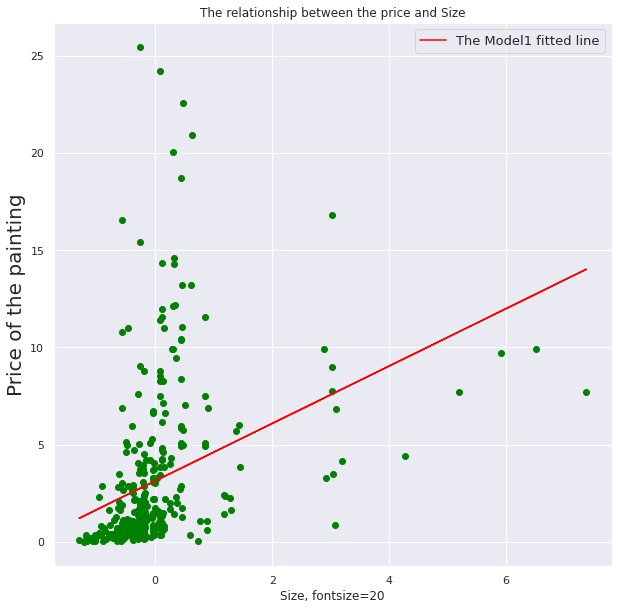

In [30]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
Data=pd.read_csv("monet.csv")
#Adding a new variable
Data["Size"]=Data["HEIGHT"]*Data["WIDTH"]
#Target variable
y=Data.pop('PRICE')
X=Data # not included the target variable
#Splitting the data into train and test 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)
print("The few rows of X_train:\n", X_train.head())
print("") #create space between the successive print statements
print("")
# Transform the data so that mean=0,and Sd=1 for each column
Scaled=StandardScaler() # create an instance of StandardScaler()
#fit the train data
Scaled.fit(X_train)
X_train_transformed=Scaled.transform(X_train)
X_test_transformed=Scaled.transform(X_test)
#Task1, Linear Regression Model1
Size_X_train=np.reshape(X_train_transformed[:,5], (X_train_transformed.shape[0],1))
Size_X_test=np.reshape(X_test_transformed[:,5], (X_test_transformed.shape[0],1))
Model1=LinearRegression()
Model1.fit(Size_X_train,y_train)
pred=Model1.predict(Size_X_train)
pred=Model1.predict(Size_X_test)
print("The predicted price by the Model1:\n",pred)
print("")#create space between the successive print statements 
print("")
#Evaluation of the Model1
Score1_test=Model1.score(Size_X_test,y_test)
print("The R Squared score on test data caused by Model1:\n", Score1_test)
print("")#create space between the successive print statements 
print("")
#Error made by the Model1 on test data
#Root Mean Squared Error (RMSE)
Error=np.sqrt(np.sum(abs(y_test-pred)**2))
print("The predictionerror of the Model1:\n", Error)
print("")#create space between the successive print statements 
print("")
#Create visualization
plt.figure(figsize=(10,10))
plt.scatter(Size_X_train,y_train,color="green")
plt.plot(Size_X_train,Model1.predict(Size_X_train),color="red", label="The Model1 fitted line")
plt.xlabel("Size, fontsize=20")
plt.ylabel("Price of the painting", fontsize=20)
plt.title("The relationship between the price and Size")
plt.legend(fontsize=13)



The predicted price by the Model1:
 [ 6.84997457  3.51023932  3.70265205  3.74388335  3.75762712  3.08418256
  3.1116701   3.05669503  3.70265205  3.74388335  4.14245258  4.14245258
  3.20787646  1.43493059  2.24581281  2.72684464  3.12541386  0.7339985
  3.73013959  3.71639582  3.70265205  3.55147062  3.13915763  2.6993571
  2.6993571   2.75433217  2.64438204  1.92970618  2.30078788  2.67186957
  3.70265205  3.99127115  3.73013959  3.73013959  4.14245258  3.1116701
  3.1116701   3.05669503  6.57509924  4.16994011  9.5437528   3.1116701
  2.67186957  3.12541386  3.70265205  4.08747751  1.70980592  3.1116701
  0.78897357  2.50694437  2.41073801  3.12541386  4.16994011  2.24581281
  1.68231839  3.1116701   1.43493059  3.74388335  3.70265205  0.7752298
  2.23206904 -0.24180892  1.43493059  3.1116701   2.24581281  4.14245258
  3.70265205  3.93629608  3.74388335  2.67186957  3.59270192  2.19083774
  2.71310087  3.71639582  2.6993571   4.16994011  3.1941327   2.57566321
  3.71639582  3.11167

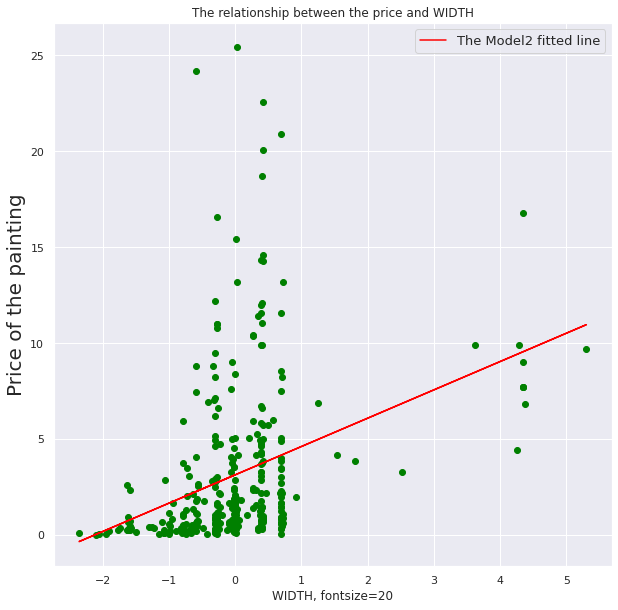

In [31]:
#Model2 (independent variable is WIDTH)
WIDTH_X_train=np.reshape(X_train_transformed[:,1], (X_train_transformed.shape[0],1))
WIDTH_X_test=np.reshape(X_test_transformed[:,1], (X_test_transformed.shape[0],1))
Model2=LinearRegression()
Model2.fit(Size_X_train,y_train)
pred=Model2.predict(WIDTH_X_train)
pred=Model2.predict(WIDTH_X_test)
print("The predicted price by the Model1:\n",pred)
print("")#create space between the successive print statements 
print("")
#Evaluation of the Model2
Score2_test=Model2.score(WIDTH_X_test,y_test)
print("The R Squared score on test data caused by Model2:\n", Score1_test)
print("")#create space between the successive print statements 
print("")
#Error made by the Model2 on test data
#Root Mean Squared Error (RMSE)
Error=np.sqrt(np.sum(abs(y_test-pred)**2))
print("The predictionerror of the Model2:\n", Error)
print("")#create space between the successive print statements 
print("")
#Create visualization
plt.figure(figsize=(10,10))
plt.scatter(WIDTH_X_train,y_train,color="green")
plt.plot(WIDTH_X_train,Model1.predict(WIDTH_X_train),color="red", label="The Model2 fitted line")
plt.xlabel("WIDTH, fontsize=20")
plt.ylabel("Price of the painting", fontsize=20)
plt.title("The relationship between the price and WIDTH")
plt.legend(fontsize=13)



In [32]:
#Task 2 (Multiple Linear Regression)
Model=LinearRegression()
Model.fit(X_train_transformed,y_train)
pred=Model.predict(X_test_transformed)
print("The predicted price by the Model:\n",pred)
print("")#create space between the successive print statements 
print("")
#Root Mean Squared Error (RMSE)
Error=np.sqrt(np.sum(abs(y_test-pred)**2))
print("The predictionerror of the Model:\n", Error)
print("")#create space between the successive print statements 
print("")
Score_test=Model.score(X_test_transformed,y_test)
print("The R Squared score on test data caused by Model:\n", Score1_test)
print("")#create space between the successive print statements 
print("")
#Task 2 (Multiple Linear Regression)
Model=LinearRegression()
Model.fit(X_train_transformed,y_train)
pred=Model.predict(X_test_transformed)
print("The predicted price by the Model:\n",pred)
print("")#create space between the successive print statements 
print("")
#Root Mean Squared Error (RMSE)
Error=np.sqrt(np.sum(abs(y_test-pred)**2))
print("The predictionerror of the Model:\n", Error)
print("")#create space between the successive print statements 
print("")
Score_test=Model.score(X_test_transformed,y_test)
print("The R Squared score on test data caused by Model:\n", Score1_test)
print("")#create space between the successive print statements 
print("")




The predicted price by the Model:
 [ 6.78831725  5.20462741  1.840741    3.39829521  4.75226462  3.50447205
  3.31328095  3.03499456  3.396163    4.25638632  4.64964981  1.82017906
  0.94103032 -0.96584239  1.65912125  2.54712381  3.30877105  1.28449975
  3.29901868  4.34780891  4.42013083  6.54426681  4.32966209  3.11539494
  2.72163991  2.80924266  4.44907399  1.8136572   3.60392394  2.23274674
  3.2439358   3.76624875  4.2340503   3.88188433  4.8748083   2.12080284
  3.33918514  4.39051662  6.54808829  5.41587946  9.14758313  2.82155796
  1.71598322  2.821087    3.6369646   3.99778668  1.8352517   2.12080284
  1.25394489  2.96452842  2.37293865  5.68917406  4.46000513  1.02872987
  1.54160781  2.75589584  1.72327991  3.03839774  4.18590509  3.52250663
  2.09265645 -1.76011071  1.35923236  2.86405177  3.57980977  4.50099672
  4.81588227  3.98127457  4.25638632  1.80233661  3.96114605  2.5883744
  2.07039323  4.28533817  3.64975     4.25337034  2.90678539  1.73349989
  2.06877836  2.2